In [61]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

In [62]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None

def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    
def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

In [63]:
data = pd.read_csv(r"joined_data.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 8949 to 12215
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    21287 non-null  object 
 1   city_development_index  21287 non-null  float64
 2   gender                  16271 non-null  object 
 3   relevent_experience     21287 non-null  object 
 4   enrolled_university     20870 non-null  object 
 5   education_level         20775 non-null  object 
 6   major_discipline        18162 non-null  object 
 7   experience              21217 non-null  object 
 8   company_size            14727 non-null  object 
 9   company_type            14513 non-null  object 
 10  last_new_job            20824 non-null  object 
 11  training_hours          21287 non-null  int64  
 12  target                  21287 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [64]:
data.drop("city", axis = 1, inplace=True)
#data.head()

In [65]:
cat_vars = ['gender', 'relevent_experience', 'enrolled_university',
            'education_level', 'major_discipline', 'company_type']
dis_vars = ['experience', 'company_size', 'last_new_job', 'training_hours']
con_vars = ['city_development_index']
dep_var = ['target']

#target = ['target']

#categorical_vars = ['gender', 'relevent_experience', 'enrolled_university',
        #    'education_level', 'major_discipline', 'company_type']

#discrete_vars = ['experience', 'company_size', 'last_new_job', 'training_hours']

#continuous_vars = ['city_development_index']

In [66]:
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,
8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [67]:
# Not all columns are appearing
data.describe()

,city_development_index,training_hours,target
count,21287.000000,21287.000000,21287.000000
mean,0.828462,65.328510,0.251468
std,0.123537,60.075201,0.433867
min,0.448000,1.000000,0.000000
25%,0.739000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,1.000000
max,0.949000,336.000000,1.000000


### Plot Pairplots against the target

<Figure size 1440x1440 with 0 Axes>

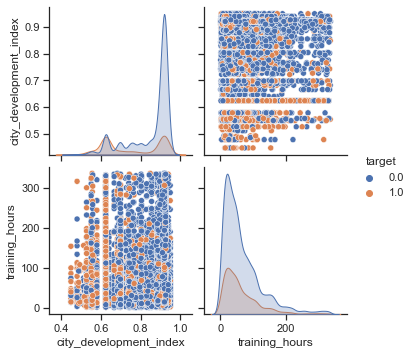

In [68]:
# Plot pairplots between two variables
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='target')



Not much information can be interpreted. Plus not all the columns are showing.

In [69]:
# Not all data is appearing
data.shape

(21287, 12)

In [70]:
# Check for count again. second time
data.count()

city_development_index    21287
gender                    16271
relevent_experience       21287
enrolled_university       20870
education_level           20775
major_discipline          18162
experience                21217
company_size              14727
company_type              14513
last_new_job              20824
training_hours            21287
target                    21287
dtype: int64

From the count above it appears, gender, enrolled_university, education_level, major_discpline, experience, company size, company type, last new job all have less than 19,158 rows¶

In [71]:
data.isnull().sum().sum()

22937

There is total of 22,937 missing values

### Determine which columns have missing or nan values

In [72]:
count_nan_in_df = data.isnull().sum()
print (count_nan_in_df)

city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
dtype: int64


### Determine how many unique values are in a column. This will help determine which features are categorical or discrete/continous


In [73]:
unique_values = data.nunique()
print(unique_values)

city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64


### Determine values categorical, variable and discrete variables data

In [74]:
for item in dep_var+cat_vars+dis_vars +con_vars:
    print(data[item].value_counts())
    print()

0.0    15934
1.0     5353
Name: target, dtype: int64

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64

Has relevent experience    15316
No relevent experience      5971
Name: relevent_experience, dtype: int64

no_enrollment       15336
Full time course     4192
Part time course     1342
Name: enrolled_university, dtype: int64

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

STEM               16113
Humanities           749
Other                421
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64

Pvt Ltd                10958
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Other                    133
Name: company_type, dtype: int64

>20    3669
5      1593
4      1548
3      1508
6      1346
2      1255
7      1144
9      

Note that some of the category bins have values sunce '>'4 or '<'10 or '>'20 or '+'. These would have to be replaced so that the data can truly become integers. Focus is on the categorical variables.

### Check the target and report the split between 0 and 1

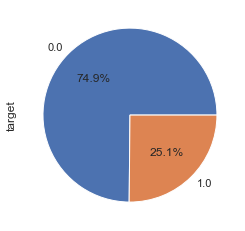

In [75]:
plt.figure(figsize=(4,4))
data['target'].value_counts().plot.pie(autopct='%1.1f%%');

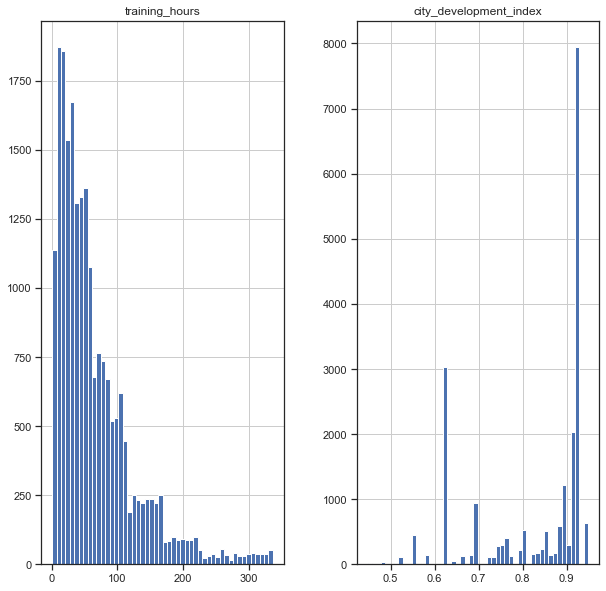

In [76]:
# we use the .hist() pandas function here for the more compact view
# we can accomplish the same with plt.subplots, sns.distplot() and a few extra lines of code
data.loc[:, dis_vars + con_vars].hist(bins=50, figsize=(10,10))
plt.show()

Again not all features/columns are showing

### Check for correlations

In [77]:
data.corr()

,city_development_index,training_hours,target
city_development_index,1.000000,-0.000556,-0.342328
training_hours,-0.000556,1.000000,-0.019615
target,-0.342328,-0.019615,1.000000


Again not all features showing.  City development index has moderate correlation to the target. Training hours not much

### Start to Clean Data

In [78]:
na_values = {'gender':'Other', 
             #'relevent_experience':'other',
             'enrolled_university':'Other',
             'education_level':'Other',
             'major_discipline':'Other',
             'company_type':'Other',
             'experience':0,
             'company_size':0,
             'last_new_job':0}

data.fillna(value=na_values, inplace=True)

For categorical missing values are group in 'other' while for discrete and continous variables they are zeroes. 

In [79]:
#data['company_size'].unique()

Below we are removing '/' '+' '-' signs. We chose upper limit when eliminating the ranges.

In [80]:
data.replace({'experience': {'>20':21, '<1':0},
             'last_new_job': {'never':0, '>4':5},
              'company_size': {'<10':10,
                               '10/49':49,
                               '50-99':99,
                               '100-500':500,
                               '500-999':999,
                               '1000-4999':4999,
                               '5000-9999':9999,
                               '10000+':15000}
             }, inplace=True)

## Run some of the visualizations again from the top to see the data again for cleaning and analysis and confirmation purposes

### Check how many missing or null values there

In [81]:
# Missing values
count_nan_in_df = data.isnull().sum()
print (count_nan_in_df)

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


### Count values for each variable

In [82]:
for item in dep_var+cat_vars+dis_vars +con_vars:
    print(data[item].value_counts())
    print()

0.0    15934
1.0     5353
Name: target, dtype: int64

Male      14681
Other      5231
Female     1375
Name: gender, dtype: int64

Has relevent experience    15316
No relevent experience      5971
Name: relevent_experience, dtype: int64

no_enrollment       15336
Full time course     4192
Part time course     1342
Other                 417
Name: enrolled_university, dtype: int64

Graduate          12867
Masters            4857
High School        2239
Other               512
Phd                 468
Primary School      344
Name: education_level, dtype: int64

STEM               16113
Other               3546
Humanities           749
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64

Pvt Ltd                10958
Other                   6907
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Name: company_type, dtype: int64

21    3669
5     1593
4     1548
3     15

### Convert some of the features to integers for machine learning purposes

In [83]:
data = data.astype({'experience':'int64', 
                    'company_size':'int64',
                    'last_new_job':'int64',
                    'target':'int64'
                   })

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 8949 to 12215
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21287 non-null  float64
 1   gender                  21287 non-null  object 
 2   relevent_experience     21287 non-null  object 
 3   enrolled_university     21287 non-null  object 
 4   education_level         21287 non-null  object 
 5   major_discipline        21287 non-null  object 
 6   experience              21287 non-null  int64  
 7   company_size            21287 non-null  int64  
 8   company_type            21287 non-null  object 
 9   last_new_job            21287 non-null  int64  
 10  training_hours          21287 non-null  int64  
 11  target                  21287 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 2.1+ MB


Count is the same for all features and indeed more features are now succesfully  integers.

In [85]:
data.describe()

,city_development_index,experience,company_size,last_new_job,training_hours,target
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000
mean,0.828462,10.067412,2350.980833,1.958284,65.328510,0.251468
std,0.123537,6.799398,4783.261696,1.680522,60.075201,0.433867
min,0.448000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.739000,4.000000,0.000000,1.000000,23.000000,0.000000
50%,0.903000,9.000000,99.000000,1.000000,47.000000,0.000000
75%,0.920000,16.000000,500.000000,3.000000,88.000000,1.000000
max,0.949000,21.000000,15000.000000,5.000000,336.000000,1.000000


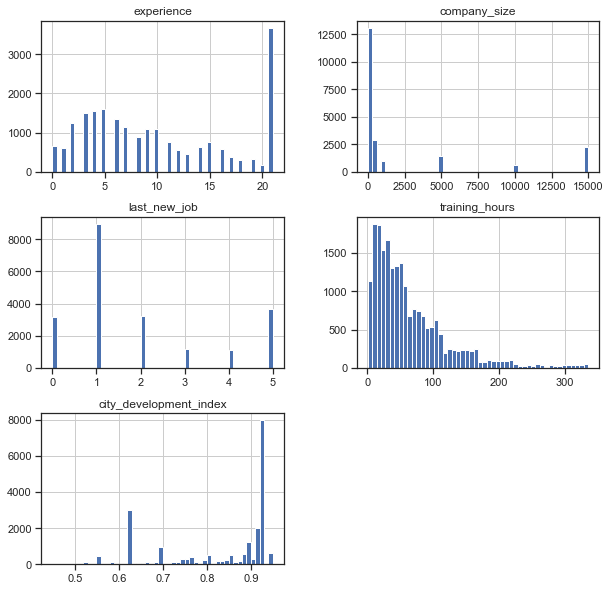

In [86]:
# we use the .hist() pandas function here for the more compact view
# we can accomplish the same with plt.subplots, sns.distplot() and a few extra lines of code
data.loc[:, dis_vars + con_vars].hist(bins=50, figsize=(10,10))
plt.show()

In [87]:
data.corr()

,city_development_index,experience,company_size,last_new_job,training_hours,target
city_development_index,1.000000,0.340922,0.075362,0.199166,-0.000556,-0.342328
experience,0.340922,1.000000,0.108715,0.480098,0.001451,-0.181956
company_size,0.075362,0.108715,1.000000,0.129331,-0.009465,-0.073574
last_new_job,0.199166,0.480098,0.129331,1.000000,-0.001460,-0.089091
training_hours,-0.000556,0.001451,-0.009465,-0.001460,1.000000,-0.019615
target,-0.342328,-0.181956,-0.073574,-0.089091,-0.019615,1.000000


<Figure size 1440x1440 with 0 Axes>

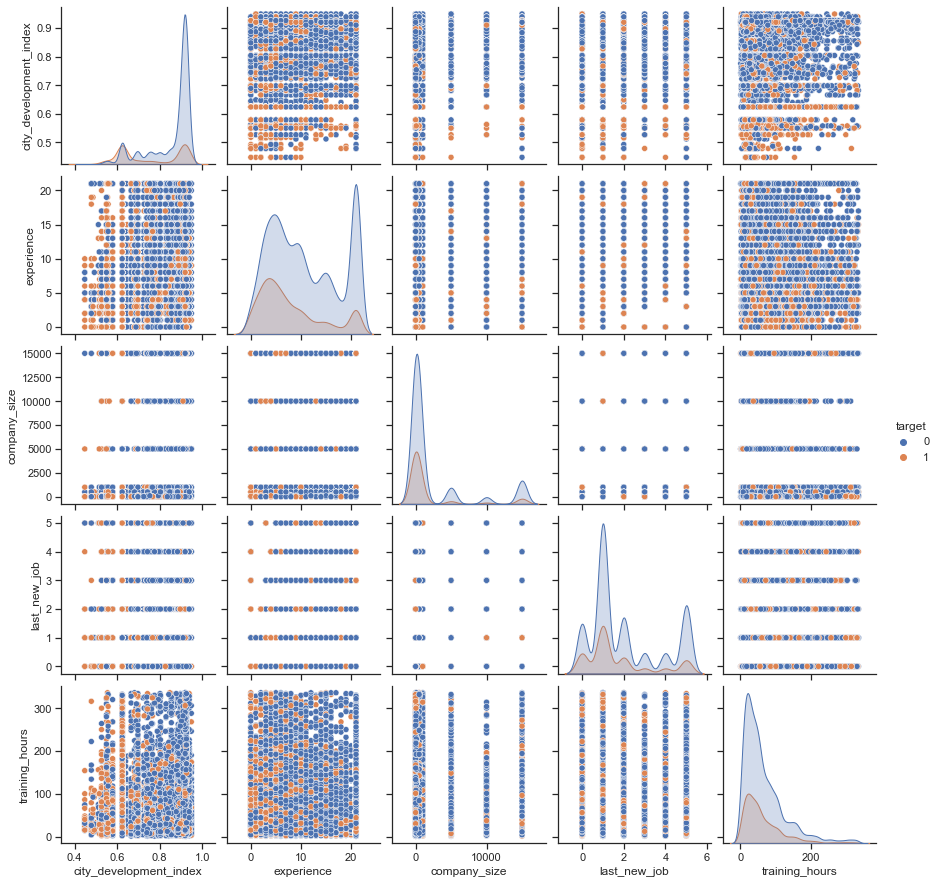

In [88]:
# Plot pairplots between two variables
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='target')

In [89]:
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,
8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,0,Other,1,36,1
29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,99,Pvt Ltd,5,47,0
11561,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,0,Other,0,83,0
33241,0.789,Other,No relevent experience,Other,Graduate,Business Degree,0,0,Pvt Ltd,0,52,1
666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,99,Funded Startup,4,8,0


# Transforming the Data

 Declaring the variables again (removing the training_hour variable since it is insignificant

In [90]:
# Dropped Training hours from the the discrete variable

dis_vars.remove('training_hours')

Using one hot encorder to convert categorical data to numerical
Using MinMaxScaler to scale numerical down between 0 to 1
Using Pipelines to do this

In [91]:
# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, cat_vars)]

# Numerical - scale
#num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, dis_vars+con_vars)]

Create a list and include the transformed data in it.

In [92]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(data[cat_vars + dis_vars + con_vars])
X = ct.transform(data[cat_vars + dis_vars + con_vars])
y = data[dep_var].values

In [93]:
X
#len(X)

array([[0.        , 1.        , 0.        , ..., 0.        , 0.2       ,
        0.94211577],
       [0.        , 1.        , 0.        , ..., 0.0066    , 1.        ,
        0.65469062],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.35129741],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.8762475 ],
       [0.        , 1.        , 0.        , ..., 0.03333333, 0.2       ,
        0.71057884],
       [0.        , 1.        , 0.        , ..., 1.        , 0.4       ,
        0.71057884]])

## Multicollinearity  Check

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
df = data [['experience', 'company_size', 'last_new_job','city_development_index', 'training_hours']]

In [96]:
vif = [variance_inflation_factor(exog = df.values,
                                exog_idx = i) for i in range(df.shape[1])]
pd.DataFrame({'Coef Name' : df.columns,
             'VIF': np.around(vif, 2)})

,Coef Name,VIF
0,experience,4.45
1,company_size,1.27
2,last_new_job,3.09
3,city_development_index,5.15
4,training_hours,2.13


In [97]:
corr_matrix = data.corr()
corr_matrix

,city_development_index,experience,company_size,last_new_job,training_hours,target
city_development_index,1.000000,0.340922,0.075362,0.199166,-0.000556,-0.342328
experience,0.340922,1.000000,0.108715,0.480098,0.001451,-0.181956
company_size,0.075362,0.108715,1.000000,0.129331,-0.009465,-0.073574
last_new_job,0.199166,0.480098,0.129331,1.000000,-0.001460,-0.089091
training_hours,-0.000556,0.001451,-0.009465,-0.001460,1.000000,-0.019615
target,-0.342328,-0.181956,-0.073574,-0.089091,-0.019615,1.000000


<AxesSubplot:>

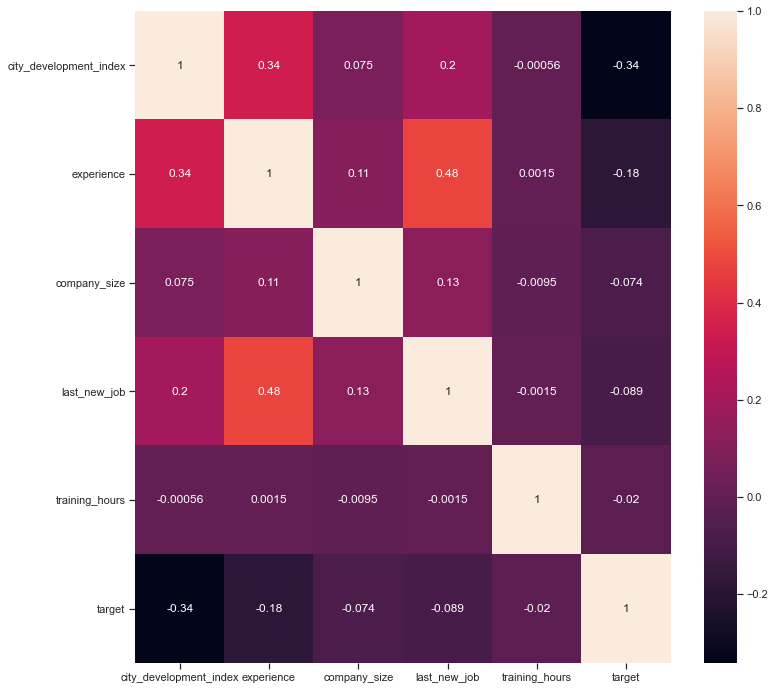

In [98]:
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(corr_matrix, annot=True)

In [99]:
df = data [['experience', 'company_size', 'last_new_job','city_development_index']]

The 'training_hours' variable is checked. It seems like it is decreasing the predictive power by increasing the standard deviation.

There is no multicollinearity issue detected!

# Machine Learning - Supervised

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [101]:
# cross-validation - Checking the dataset's homogeneity
scores = cross_val_score(rfc, X, np.ravel(y), cv=5, scoring= 'neg_mean_squared_error')
display_scores(scores)

Scores: [0.47556547 0.47851932 0.48708961 0.47931123 0.47685447]
Mean: 0.4794680184657791
Standard deviation: 0.004026753789041661


Dataset looks homogeneous

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17029, 31) (4258, 31) (17029, 1) (4258, 1)


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
param_grid = {"max_depth": [1,2,3,4,5,6,7,8,9,10,15,20, None],
              "max_features": randint(1, 25),
              "min_samples_leaf": randint(1, 25),
              "criterion": [ "gini","entropy"]}

In [104]:
classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Checking the Best parameters for multiple classification methods

In [105]:
clf = RandomizedSearchCV(classifier ,param_grid, scoring='roc_auc', cv=5)
search = clf.fit(X_train, y_train)
search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 19,
 'min_samples_leaf': 6}

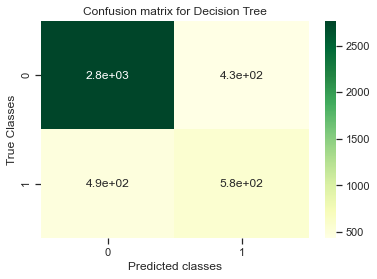

In [106]:
#final_model_gnb = gnb().fit(train[features], train[target])
y_predict = search.predict(X_test)

#print('test accuracy for Decision Tree:'\
 #     , round(accuracy_score(y_test, y_predict)*100, 2), '%')
plt.title('Confusion matrix for Decision Tree')
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()



In [107]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

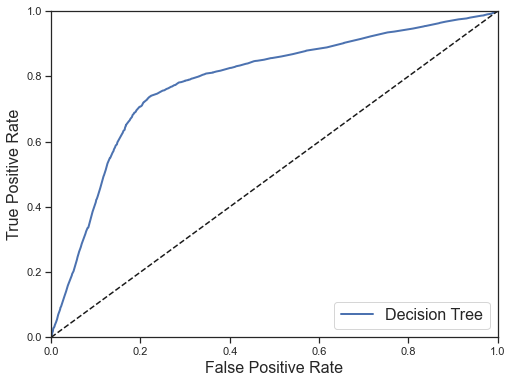

In [108]:
best_DT_model = search.best_estimator_

y_probas_DT = cross_val_predict(best_DT_model, X_train, np.ravel(y_train), cv=5, method="predict_proba")
y_scores_DT = y_probas_DT[:, 1] 
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_train,y_scores_DT)
# last, we fit our data. This will take a while...
                                          
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_DT, tpr_DT, "Decision Tree")
plt.legend(loc="lower right", fontsize=16)
#plt.show()clf.fit(X_train, np.ravel(y_train))

In [109]:
from sklearn.model_selection import GridSearchCV
# we create a dictionary of lists, each key is a parameter name
# and the list is the possible values it can take
# we have reduced the grid options to allow faster parameter searching
# for a larger search you can include 'l1' and 'elasticnet' penalities
# and 'constant' and 'optimal' learning_rates
param_grid = {'n_estimators' : [4, 5, 10, 15,20,30,40,50,60,70,80,90,100,150]}

# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
rf_model = RandomForestClassifier()
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search.fit(X=X_train, y=np.ravel(y_train))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [4, 5, 10, 15, 20, 30, 40, 50, 60, 70,
                                          80, 90, 100, 150]},
             scoring='roc_auc')

In [110]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_estimators': 150}

 RandomForestClassifier(n_estimators=150)


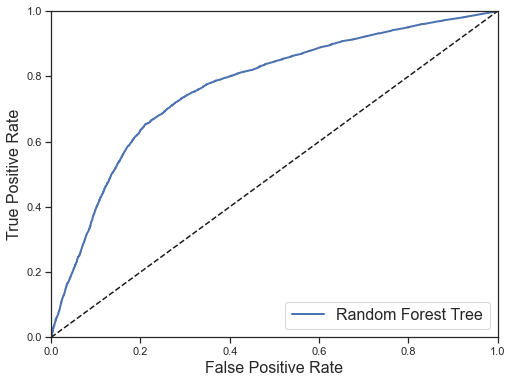

In [111]:
best_RF_model = grid_search.best_estimator_

y_probas_RF = cross_val_predict(best_RF_model, X_train, np.ravel(y_train), cv=5, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1] 
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train,y_scores_RF)
# last, we fit our data. This will take a while...
                                          
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest Tree")
plt.legend(loc="lower right", fontsize=16)
#plt.show()clf.fit(X_train, np.ravel(y_train))

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# we create a dictionary of lists, each key is a parameter name
# and the list is the possible values it can take
# we have reduced the grid options to allow faster parameter searching
# for a larger search you can include 'l1' and 'elasticnet' penalities
# and 'constant' and 'optimal' learning_rates
param_grid = dict(n_neighbors = (3, 5,7,8, 10,15,18,20,25,30,35,40,45))

# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
knn_model = KNeighborsClassifier()
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=knn_model, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)
# last, we fit our data. This will take a while...

grid_search.fit(X=X_train, y=np.ravel(y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 5, 7, 8, 10, 15, 18, 20, 25, 30, 35,
                                         40, 45)},
             scoring='roc_auc')

In [113]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_neighbors': 30}

 KNeighborsClassifier(n_neighbors=30)


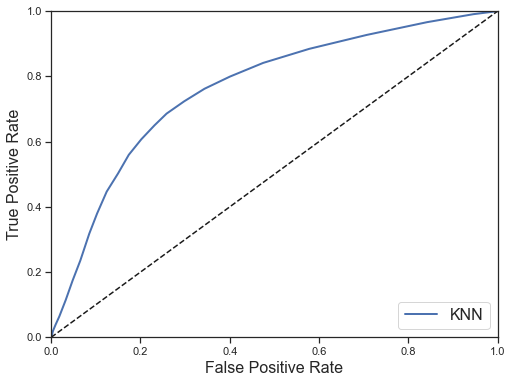

In [114]:
best_KNN_model = grid_search.best_estimator_

y_probas_KNN = cross_val_predict(best_KNN_model, X_train, np.ravel(y_train), cv=5, method="predict_proba")
y_scores_KNN = y_probas_KNN[:, 1] 
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_train,y_scores_KNN)
# last, we fit our data. This will take a while...
                                          
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN")
plt.legend(loc="lower right", fontsize=16)
#plt.show()clf.fit(X_train, np.ravel(y_train))

In [115]:
X_train_set_1, X_train_set_2, y_train_set_1, y_train_set_2 =  train_test_split(X_train, y_train, test_size=0.5)

In [116]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, criterion='entropy')
tree_clf.fit(X_train_set_1, y_train_set_1)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=45).fit(X_train_set_1,y_train_set_1)

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_depth= 7,n_estimators=70, max_leaf_nodes=21,criterion= 'entropy')
rnd_clf.fit(X_train_set_1,y_train_set_1)

from sklearn.svm import SVC
clf_svc = SVC(gamma='auto', probability=True)
clf_svc.fit(X_train_set_1, y_train_set_1)

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8), n_estimators=70,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_set_1, y_train_set_1)

combined_datatest = np.stack((tree_clf.predict_proba(X_train_set_2)[:,1],
          clf_svc.predict_proba(X_train_set_2)[:,1],
          knn_clf.predict_proba(X_train_set_2)[:,1],
          ada_clf.predict_proba(X_train_set_2)[:,1],
          rnd_clf.predict_proba(X_train_set_2)[:,1]
         ),
         axis=-1)

print("Accuracy Score For KNN is: " + str(accuracy_score(knn_clf.predict(X_train_set_2),y_train_set_2)))
print("Accuracy Score For SVM is: " + str(accuracy_score(clf_svc.predict(X_train_set_2),y_train_set_2)))
print("Accuracy Score For Decision Tree is: "+ str(accuracy_score(tree_clf.predict(X_train_set_2),y_train_set_2)))
print("Accuracy Score For AdaBoost is: "+ str(accuracy_score(ada_clf.predict(X_train_set_2),y_train_set_2)))
print("Accuracy Score For Random Forest is: "+ str(accuracy_score(rnd_clf.predict(X_train_set_2),y_train_set_2)))


from sklearn.linear_model import LogisticRegression
clf_blender = LogisticRegression( solver='lbfgs',multi_class='multinomial').fit(combined_datatest, y_train_set_2)


combined_test_datatest = np.stack((tree_clf.predict_proba(X_test)[:,1],
          clf_svc.predict_proba(X_test)[:,1],
          knn_clf.predict_proba(X_test)[:,1],
          ada_clf.predict_proba(X_test)[:,1],
          rnd_clf.predict_proba(X_test)[:,1],
         ),
         axis=-1)


print("Stacking Approach Accuracy Score is: " + 
      str(accuracy_score(clf_blender.predict(combined_test_datatest), y_test)))

Accuracy Score For KNN is: 0.7691133294186729
Accuracy Score For SVM is: 0.7527891955372872
Accuracy Score For Decision Tree is: 0.7955372871403406
Accuracy Score For AdaBoost is: 0.7504403992953611
Accuracy Score For Random Forest is: 0.7597181444509689
Stacking Approach Accuracy Score is: 0.7898074213245655


test accuracy for Decision Tree: 78.44 %


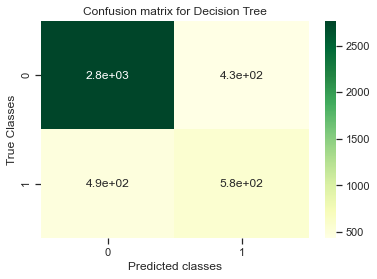

In [117]:
#final_model_gnb = gnb().fit(train[features], train[target])
y_predict = search.predict(X_test)

print('test accuracy for Decision Tree:'\
      , round(accuracy_score(y_test, y_predict)*100, 2), '%')
plt.title('Confusion matrix for Decision Tree')
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()



### ROC curves

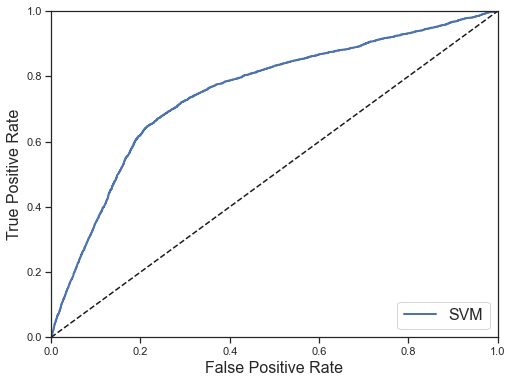

In [118]:


y_probas_svc = cross_val_predict(clf_svc, X_train, np.ravel(y_train), cv=5, method="predict_proba")
y_scores_svc = y_probas_svc[:, 1] 
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train,y_scores_svc)
# last, we fit our data. This will take a while...
                                          
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_svc, tpr_svc, "SVM")
plt.legend(loc="lower right", fontsize=16)
#plt.show()clf.fit(X_train, np.ravel(y_train))

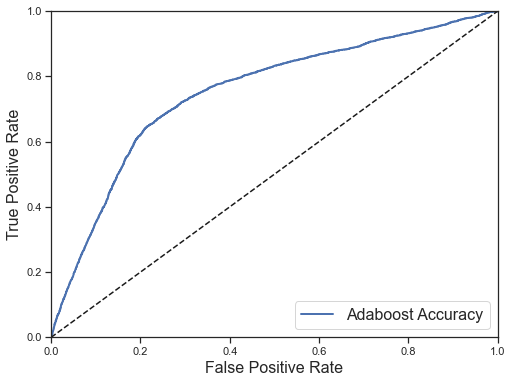

In [119]:

y_probas_ada = cross_val_predict(ada_clf, X_train, np.ravel(y_train), cv=5, method="predict_proba")
y_scores_ada = y_probas_svc[:, 1] 
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_train,y_scores_ada)
# last, we fit our data. This will take a while...
                                          
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_ada, tpr_ada, "Adaboost Accuracy")
plt.legend(loc="lower right", fontsize=16)
#plt.show()clf.fit(X_train, np.ravel(y_train))

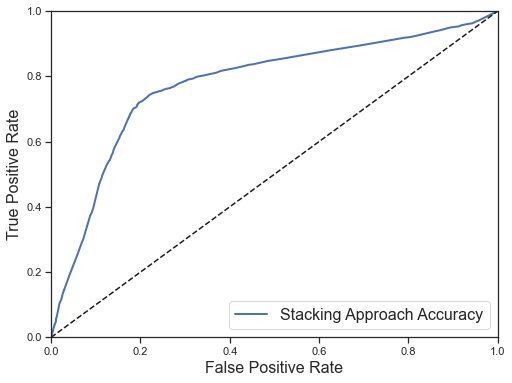

In [120]:

y_probas_S = cross_val_predict(tree_clf, X_train_set_2, np.ravel(y_train_set_2), cv=5, method="predict_proba")
y_scores_S = y_probas_S[:, 1] 
fpr_S, tpr_S, thresholds_S = roc_curve(y_train_set_2,y_scores_S)
# last, we fit our data. This will take a while...
                                          
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_S, tpr_S, "Stacking Approach Accuracy")
plt.legend(loc="lower right", fontsize=16)
#plt.show()clf.fit(X_train, np.ravel(y_train))

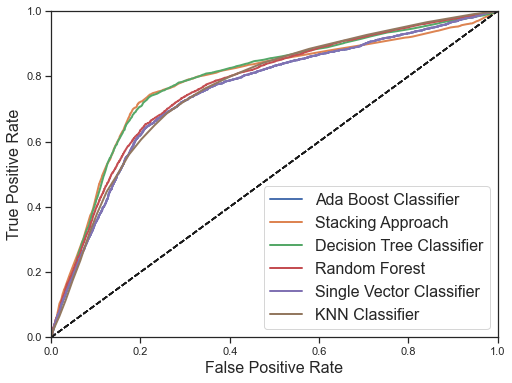

In [121]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_ada, tpr_ada, "Ada Boost Classifier")
plot_roc_curve(fpr_S, tpr_S, "Stacking Approach")
plot_roc_curve(fpr_DT, tpr_DT, "Decision Tree Classifier")
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest")
plot_roc_curve(fpr_svc, tpr_svc, "Single Vector Classifier")
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN Classifier")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Machine Learning - Unsupervised

## K-Means Clustering

In [122]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics

Text(0, 0.5, 'Sum of squared distance')

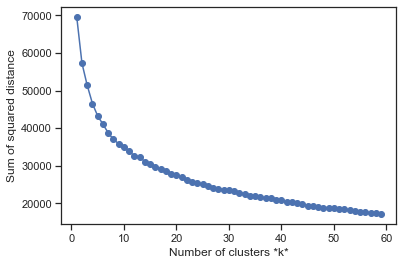

In [123]:
sse = []

# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 60))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
#plt.figure(figsize=(10, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

The elbow point looks like it appears around 10 clusters

## Heirarchical Clustering 
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

In [124]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [125]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.640284346200339

In [126]:
Z = linkage(X, 'weighted')

In [127]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.6608568209656586

In [128]:
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z, pdist(X))
c

0.5408195858087764

In [129]:
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z, pdist(X))
c

0.6042370481749872

In [130]:
Z = linkage(X, 'centroid')
c, coph_dists = cophenet(Z, pdist(X))
c

0.7647258697654421

In [131]:
Z = linkage(X, 'median')
c, coph_dists = cophenet(Z, pdist(X))
c

0.49031311001294126

In [132]:
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z, pdist(X))
c

0.7986226800889292

The Cophenetic correlation coeffficient above is This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances. In the example test, 0.98 was the value found. However, the value in our sample is 0.64, which is not close, and may imply clustering is not appropriate with this data set, or the ward method is not appropriate.

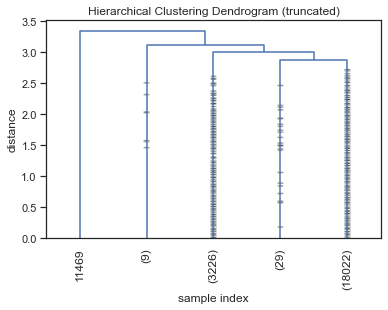

In [133]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    #show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Heirarchical clustering shows three clusters in the dendrogram.

## Silhouette Score

Text(0, 0.5, 'Sum of squared distance')

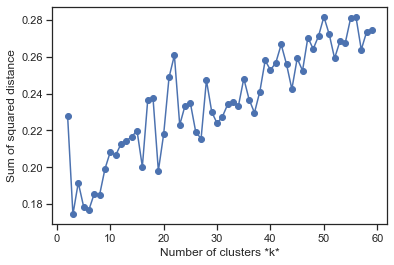

In [134]:
silhouettes = []

# k_list is the list of range in between we want to find clusters for
k_list = list(range(2, 60))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    labels = km_model.labels_
    silhouettes.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
#plt.figure(figsize=(10, 6))
plt.plot(k_list, silhouettes, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance') # Should be silhouette score

The silhouette score barely improves at 60 clusters, there may be more clusters, but my computer can't handle the time it takes to run this cell too well.

The three methods above does not bode well for using a K-Means clustering algorithm on the dataset. The K-prototype may be a better option.

## K-Prototype
https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

In [135]:
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [136]:
#Add back the training hours in discrete variables
dis_vars = ['experience', 'company_size', 'last_new_job', 'training_hours']
data_2 = data[cat_vars + dis_vars + con_vars]

In [137]:
# Get the position of categorical columns because the K-Prototype clustering algorithm in kmodes module needs categorical variables or columns position in the data.
catColumnsPos = [data_2.columns.get_loc(col) for col in list(data_2.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data_2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']
Categorical columns position  : [0, 1, 2, 3, 4, 5]


In [138]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 5):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(data_2, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [139]:
cost

[487142407708.2726, 45274879806.11298, 13681623585.4713, 1373632324.934344]

In [140]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [141]:
# Import module for data visualization
from plotnine import *
import plotnine

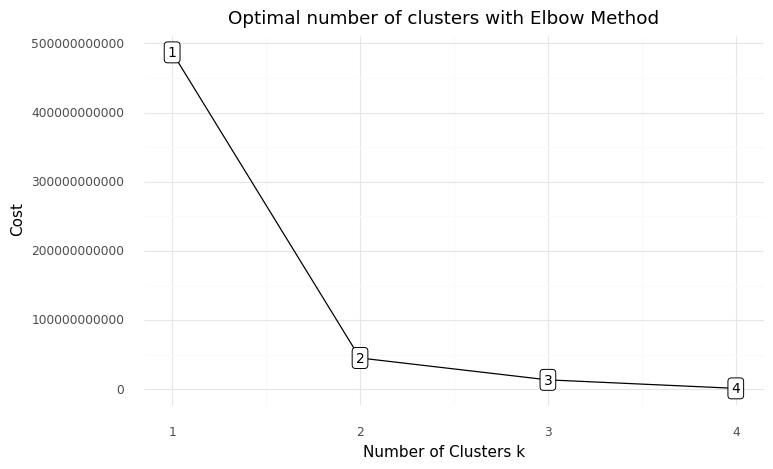

<ggplot: (8774281998451)>

In [142]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In comparison to the Kmeans, the number of clusters for K-prototype looks like it is good at 2.

In [143]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(X, categorical = catColumnsPos)

array([0, 0, 0, ..., 1, 1, 0], dtype=uint16)

In [144]:
#This has to be created due to the rearrangement of the columns in the X array
data_labeller = data_2

In [145]:
# Add the cluster to the dataframe
data_labeller['Cluster Labels'] = kprototype.labels_
data_labeller['Segment'] = data_labeller['Cluster Labels'].map({0:'First', 1:'Second'})
# Order the cluster
data_labeller['Segment'] = data_labeller['Segment'].astype('category')
data_labeller['Segment'] = data_labeller['Segment'].cat.reorder_categories(['First','Second'])

In [146]:
data_labeller['target'] = data[dep_var]

In [147]:
data_labeller.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,experience,company_size,last_new_job,training_hours,city_development_index,Cluster Labels,Segment,target
enrollee_id,,,,,,,,,,,,,,
8949,Male,Has relevent experience,no_enrollment,Graduate,STEM,Other,21,0,1,36,0.920,0,First,1
29725,Male,No relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd,15,99,5,47,0.776,0,First,0
11561,Other,No relevent experience,Full time course,Graduate,STEM,Other,5,0,0,83,0.624,0,First,0
33241,Other,No relevent experience,Other,Graduate,Business Degree,Pvt Ltd,0,0,0,52,0.789,0,First,1
666,Male,Has relevent experience,no_enrollment,Masters,STEM,Funded Startup,21,99,4,8,0.767,0,First,0


In [148]:
# Cluster centroids
kprototype.cluster_centroids_

array([[0.01352189, 0.06129923, 0.75711308, 0.71102597, 0.        ,
        0.26378951, 0.        , 0.02518452, 0.        , 0.01447969,
        0.01893064, 0.03836836, 0.01295848, 0.00743704, 0.90782579,
        0.0326779 , 0.05651023, 0.02946645, 0.27083216, 0.0544256 ,
        0.55608767, 0.51095032, 0.17466999, 0.421466  , 0.75909098,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.05002826, 0.07179197, 0.53646128, 0.06981345, 0.63284341,
        0.04946297, 0.14471453, 0.00593556, 0.09723007, 0.00367439,
        0.00791408, 0.0192199 , 0.00423968, 0.96495195, 0.        ,
        0.02487281, 0.02685133, 0.01441492, 0.59355568, 0.03278689,
        0.30751837, 0.32112574, 0.06674323, 0.24211419, 0.76097551,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [149]:
# Cluster interpretation
data_labeller.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
data_labeller.groupby('Segment').agg(
    {
        'Total':'count',
        'city_development_index': 'mean',
        'gender': lambda x: x.value_counts().index[0],
        'relevent_experience': lambda x: x.value_counts().index[0],
        'enrolled_university': lambda x: x.value_counts().index[0],
        'education_level': lambda x: x.value_counts().index[0],
        'major_discipline': lambda x: x.value_counts().index[0],
        'experience': 'mean',
        'company_size': 'mean',
        'company_type': lambda x: x.value_counts().index[0],
        'last_new_job': 'mean',
        'training_hours': 'mean',
        'target': lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,Total,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,First,17749,0.828305,Male,Has relevent experience,no_enrollment,Graduate,STEM,10.729957,2620.049918,Pvt Ltd,2.107330,65.124401,0
1,Second,3538,0.829249,Male,No relevent experience,no_enrollment,High School,Other,6.743640,1001.148389,Other,1.210571,66.352459,0


These clusters do not seem to represent anything tangible or understandable. Perhaps clustering is not appropriate for this data set.

Another attempt was made below by using the bare dataframe without transforming the categorical values, but this failed because the gender Strings were not converted into interpretable numerical values without the use of the one hot encoder.